In [1]:
import numpy as np # for numerical calculation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualising data
import seaborn as sns # advanced visualisation
import warnings
warnings.filterwarnings('ignore') # filter

df = pd.read_csv('/content/predictive_maintenance.csv')

In [2]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure


In [3]:
ct = pd.crosstab(df['Target'],df['Failure Type'])
ct

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Target,,,,,,
0,0,9643,0,0,18,0
1,112,9,78,95,0,45


In [4]:
df.loc[(df['Failure Type'] != 'No Failure') & (df['Target'] == 0), 'Target'] = 1

# Check if the values are updated in the crosstab
ct = pd.crosstab(df['Failure Type'], df['Target'])
print(ct)

Target                       0    1
Failure Type                       
Heat Dissipation Failure     0  112
No Failure                9643    9
Overstrain Failure           0   78
Power Failure                0   95
Random Failures              0   18
Tool Wear Failure            0   45


In [5]:
# Replace 1 with 0 in the 'Target' column where 'Failure Type' is 'No Failure'
df.loc[(df['Failure Type'] == 'No Failure') & (df['Target'] == 1), 'Target'] = 0

# Verify the updated values in the crosstab
ct = pd.crosstab(df['Failure Type'], df['Target'])
ct

Target,0,1
Failure Type,,
Heat Dissipation Failure,0,112
No Failure,9652,0
Overstrain Failure,0,78
Power Failure,0,95
Random Failures,0,18
Tool Wear Failure,0,45


In [6]:
df.drop(columns = {'UDI','Product ID','Type' ,'Target'},axis=1,inplace=True) # dropping unnecessary columns

df.describe()

df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

In [7]:
df.rename(columns = {'Air temperature [K]':'AirTemp', 'Process temperature [K]':'ProcessTemp',
       'Rotational speed [rpm]':'RotationSpeed', 'Torque [Nm]':'Torque', 'Tool wear [min]':'ToolWear'},inplace=True)
# renaming the columns for easier interpretation

In [8]:

df['Failure Type'] = df['Failure Type'].map({'No Failure':0, 'Power Failure':1, 'Tool Wear Failure':2,
       'Overstrain Failure':3, 'Random Failures':4,
       'Heat Dissipation Failure':5})
       # mapping the target with specific num

In [9]:
columns = df.drop(columns='Failure Type',axis=1)

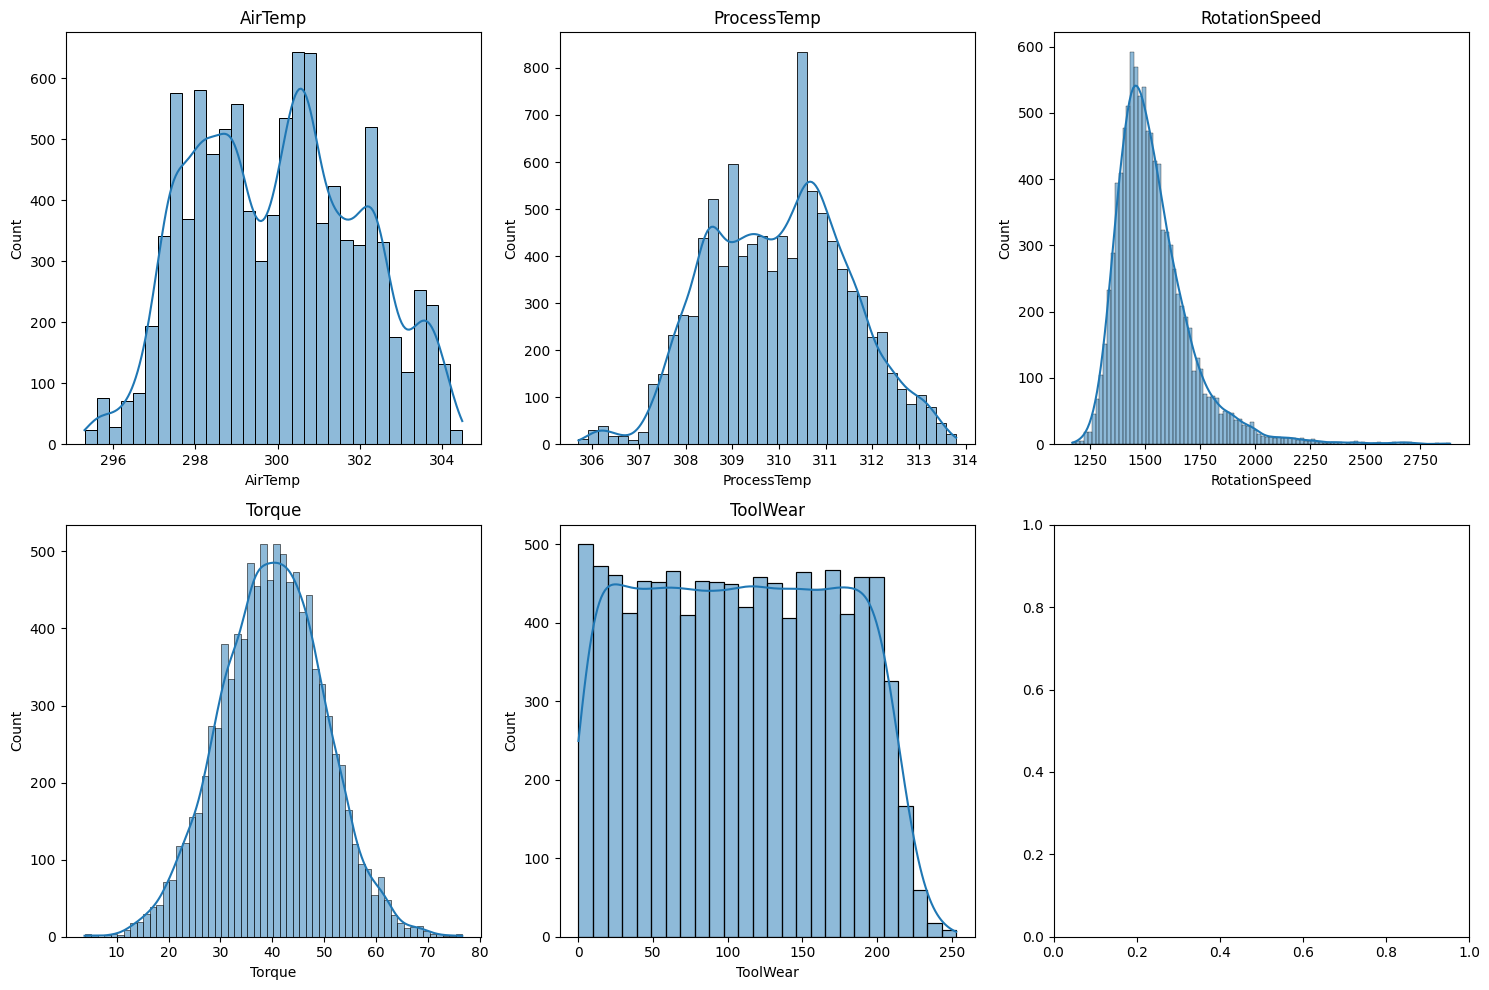

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # histogram distribution

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


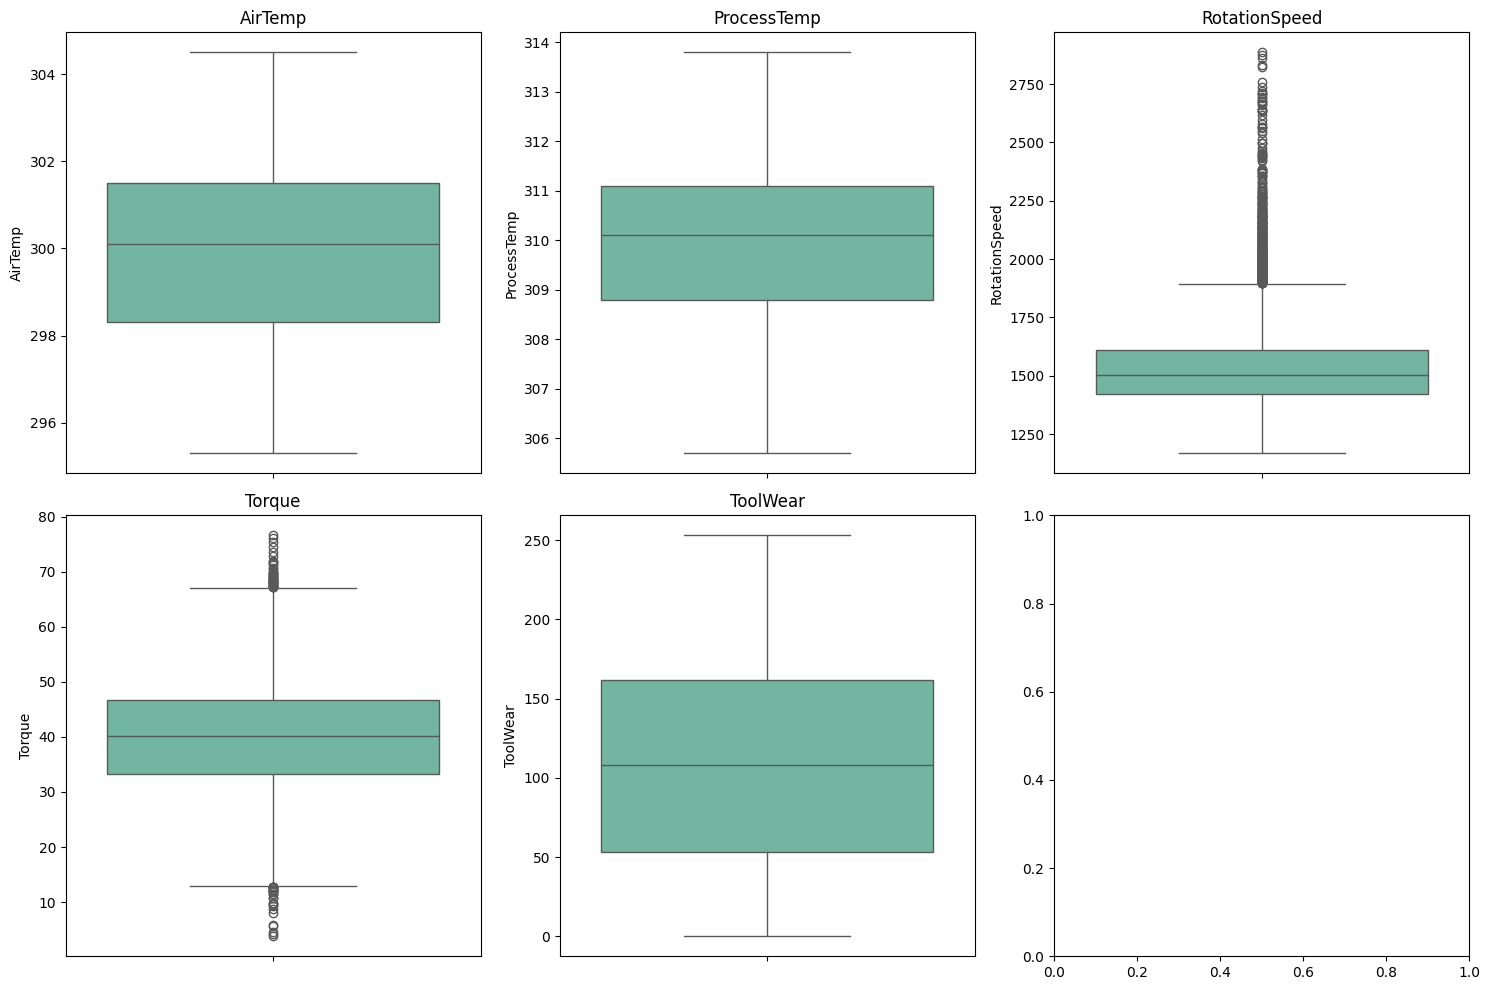

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # boxplot for outlier detection

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.boxplot(df[feature], ax=axes[i],palette='Set2')
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

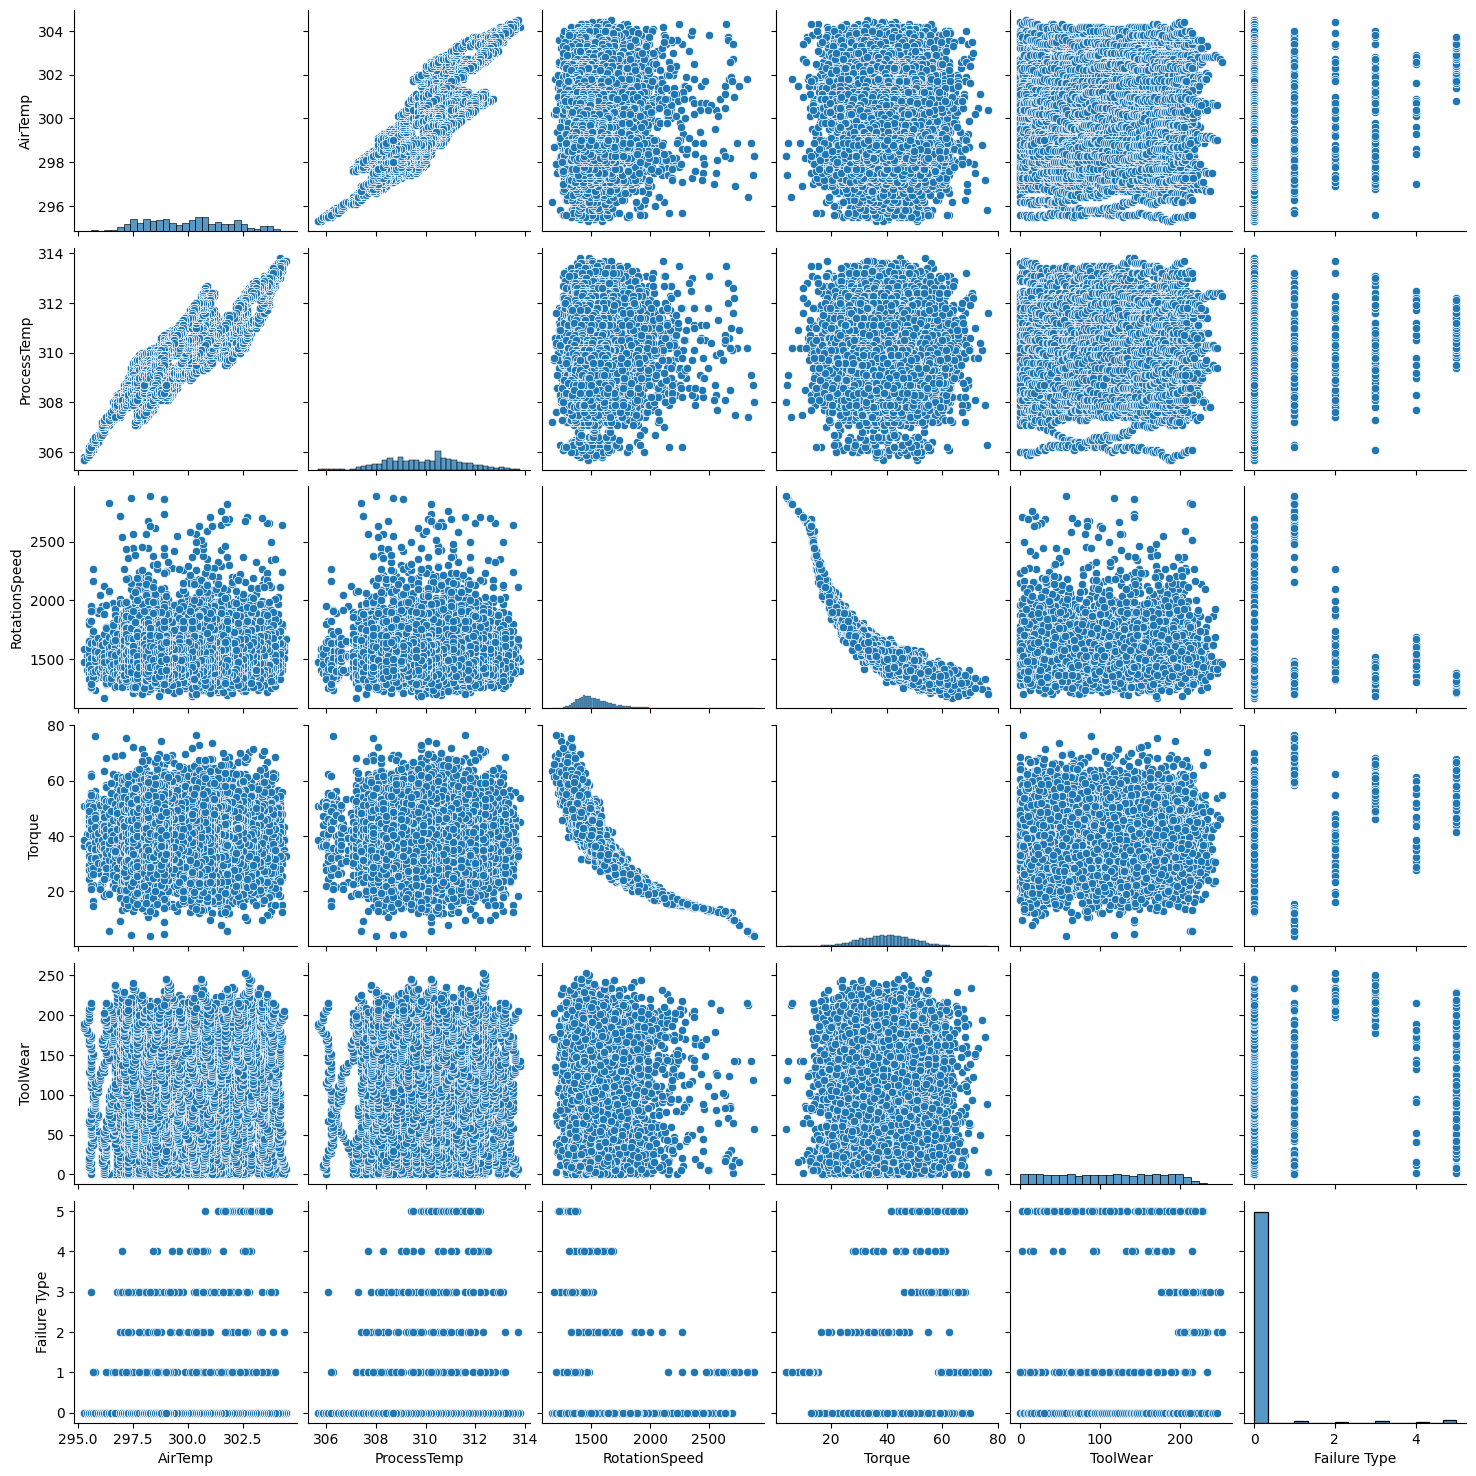

In [12]:
sns.pairplot(df) # distribution of i

In [13]:
Q1 = df['RotationSpeed'].quantile(0.25)
Q3 = df['RotationSpeed'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
df['RotationSpeed'] = np.where((df['RotationSpeed'] < lower_bound) | (df['RotationSpeed'] > upper_bound), np.nan, df['RotationSpeed'])

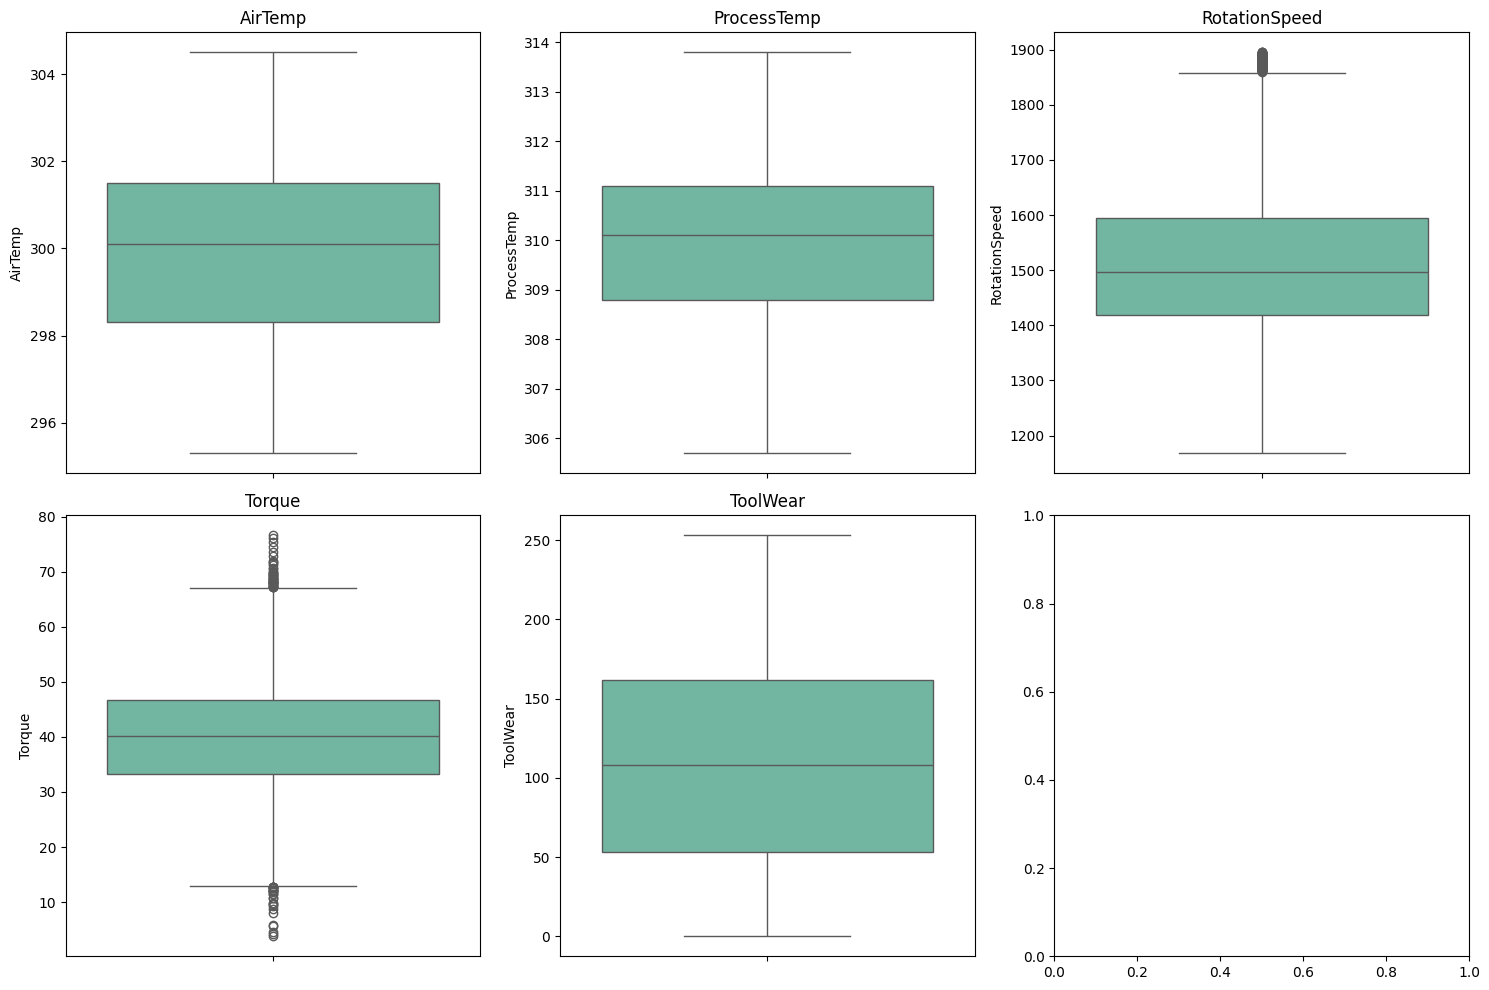

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # boxplot for outlier detection

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.boxplot(df[feature], ax=axes[i],palette='Set2')
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

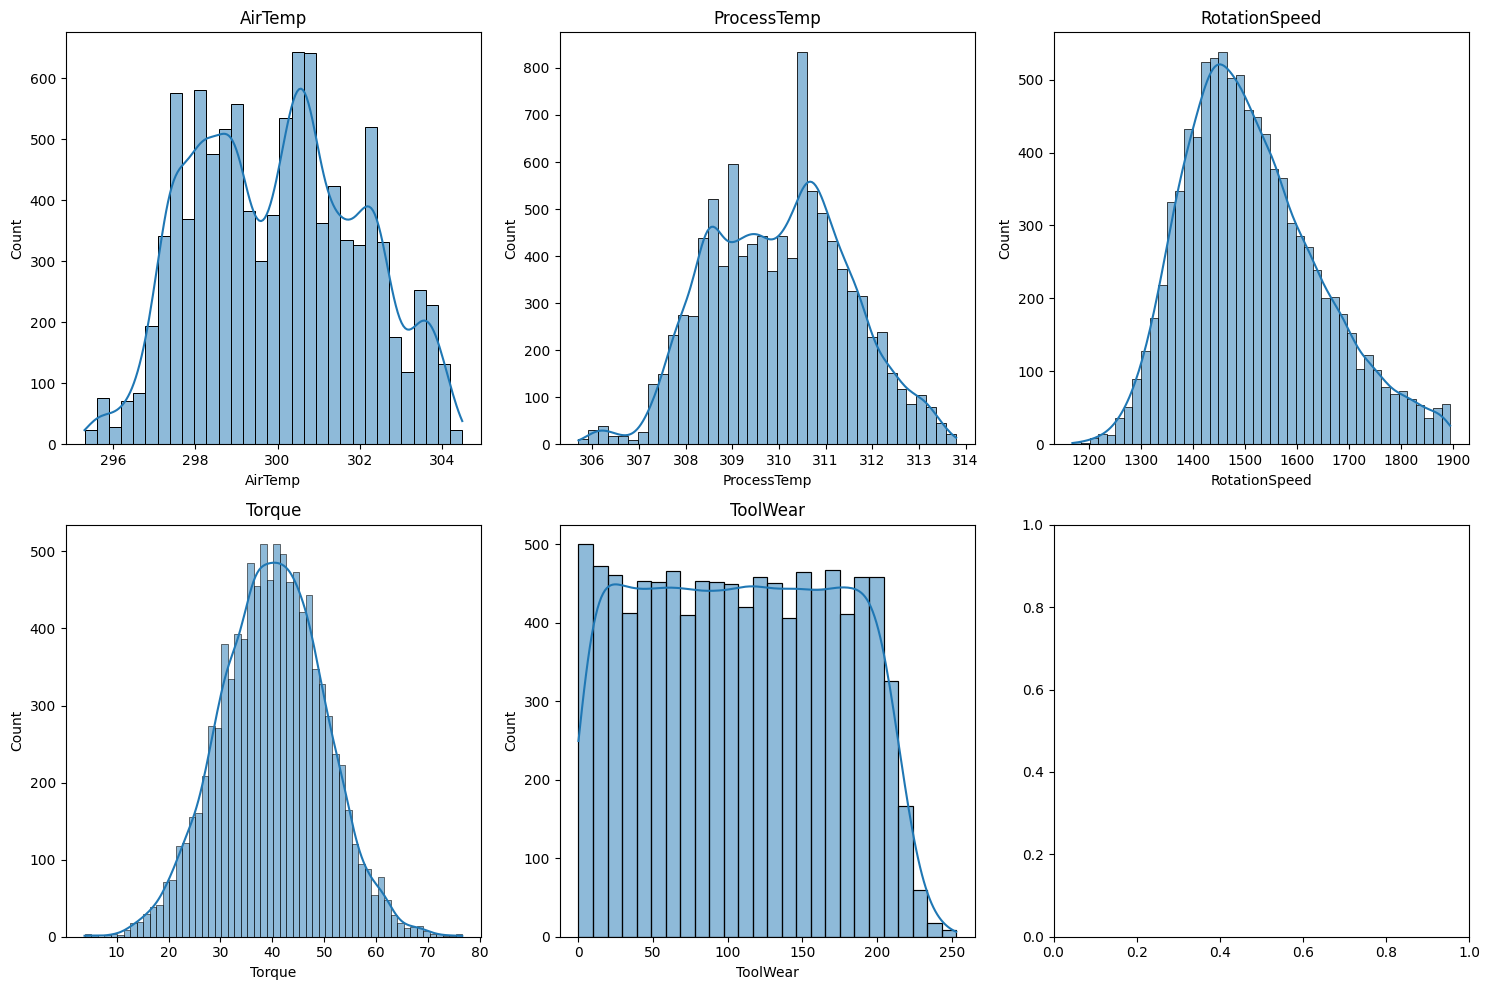

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # histogram distribution

# List of feature names
features = columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the features and plot each histogram
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<Axes: >

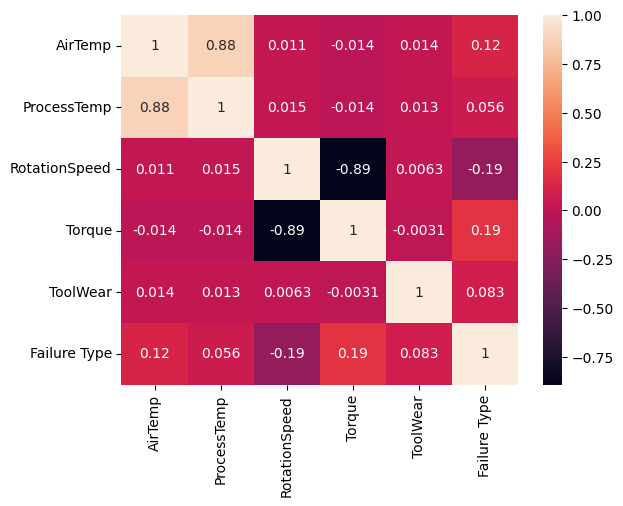

In [16]:
sns.heatmap(df.corr(method='pearson'),annot=True)

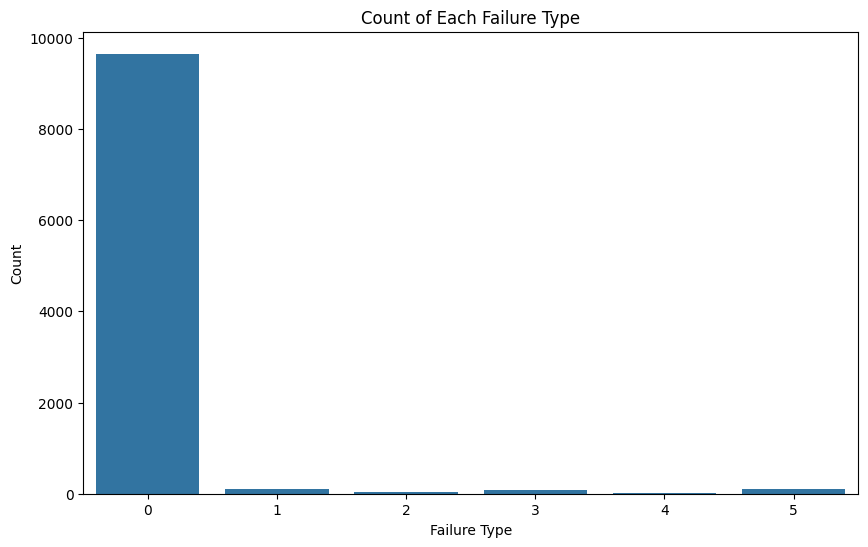

In [17]:
x = df.drop(columns = {'Failure Type'},axis=1) #input variables
y = df['Failure Type'] # target/output variables

from sklearn.model_selection import train_test_split # library to split the dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,stratify=y) # split

plt.figure(figsize=(10, 6))

# Plot the counts of each Failure Type
sns.countplot(data=df, x='Failure Type')

# Add title and labels for clarity
plt.title('Count of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')

plt.show()

In [18]:
df['RotationSpeed'].fillna(df['RotationSpeed'].median(),inplace=True) # filling NaN with median


In [19]:
x_train['RotationSpeed'].fillna(x_train['RotationSpeed'].median(),inplace=True)
x_test['RotationSpeed'].fillna(x_test['RotationSpeed'].median(),inplace=True)

In [20]:
df['AirTemp'] = df['AirTemp']-273.15
df['ProcessTemp'] = df['ProcessTemp']-273.15
# converting above features into Celsius from Kelvin

from imblearn.over_sampling import SMOTE # since dataset is imbalanced , oversampling
sm = SMOTE(random_state=42)

x_trainre,y_trainre = sm.fit_resample(x_train,y_train) # oversampling the minority class here

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

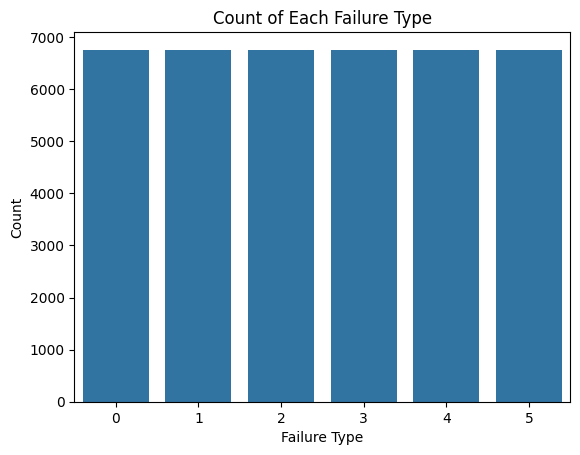

In [21]:
# Plot the counts of each Failure Type
sns.countplot(x=y_trainre)

# Add title and labels for clarity
plt.title('Count of Each Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')

plt.show()


In [22]:
x_trainre.skew()


,0
AirTemp,-0.241505
ProcessTemp,-0.242010
RotationSpeed,0.986506
Torque,-0.600036
ToolWear,-0.506822


In [23]:
from sklearn.preprocessing import StandardScaler # data needs to be standardized so standard scaler

scale = StandardScaler()
x_trains = scale.fit_transform(x_trainre)
x_tests = scale.transform(x_test) # scaled the data here

print(x_trains)

[[ 0.98131359  0.63918538  2.35583419 -1.12001786  0.96046742]
 [-0.86764901  0.08723447  0.4177096  -0.34893068 -0.69102596]
 [-1.62898656 -1.01666735  0.45028312 -0.0851377  -1.15460304]
 ...
 [ 1.03569485 -0.04505112 -1.00690124  0.50559158 -0.8358938 ]
 [ 0.98131359  0.11972838 -0.50441662  0.39313165  0.23612822]
 [ 1.49175475  0.83944563 -1.02751875  0.51710571 -1.45882551]]


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=None,min_samples_split=2,min_samples_leaf=1,class_weight='balanced',splitter ='best',criterion='entropy')

dt.fit(x_trains,y_trainre)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

y_pred = dt.predict(x_tests)


print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2896
           1       0.34      0.64      0.44        28
           2       0.12      0.36      0.18        14
           3       0.41      0.57      0.47        23
           4       0.01      0.20      0.02         5
           5       0.79      0.97      0.87        34

    accuracy                           0.93      3000
   macro avg       0.44      0.61      0.49      3000
weighted avg       0.97      0.93      0.95      3000



In [26]:
print(confusion_matrix(y_test,y_pred))

[[2717   32   36   18   84    9]
 [  10   18    0    0    0    0]
 [   8    0    5    1    0    0]
 [   6    3    1   13    0    0]
 [   4    0    0    0    1    0]
 [   1    0    0    0    0   33]]


In [27]:
print(f'testing accuracy = {accuracy_score(y_test, y_pred) * 100}')
print(f'precision = {precision_score(y_test, y_pred, average="weighted") * 100}')
print(f'recall = {recall_score(y_test, y_pred, average="weighted") * 100}')
print(f'f1_score = {f1_score(y_test, y_pred, average="weighted") * 100}')

testing accuracy = 92.9
precision = 97.09029458376108
recall = 92.9
f1_score = 94.82298738864105


In [28]:
new_data = [298.9,308.9,1453,40.8,11]
new_data_as_numpy_array = np.asarray(new_data)
input_data_reshaped = new_data_as_numpy_array.reshape(1,-1)
prediction = dt.predict(input_data_reshaped)
print(prediction)

[1]


# Hyperparameter tuning using Grid Search CV

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=None,min_samples_split=2,min_samples_leaf=1,class_weight='balanced',splitter ='best',criterion='entropy')

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy'],        # Splitting criteria
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],            # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider when splitting
    'class_weight': [None, 'balanced'],       # Weights associated with classes
    'splitter': ['best', 'random']            # Strategy used to split at each node
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)

# Fit the model
grid_search.fit(x_trains, y_trainre)

# Get the best parameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


In [ ]:
best_dt = DecisionTreeClassifier(
    class_weight=grid_search.best_params_['class_weight'],
    criterion=grid_search.best_params_['criterion'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    max_features=grid_search.best_params_['max_features'],
    splitter=grid_search.best_params_['splitter'],
    random_state=42
)

# Fit the model to the training data
best_dt.fit(x_train, y_train)

In [ ]:
y_pred = best_dt.predict(x_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

In [ ]:
# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
new_data = [298.7,308.5,1467,40.7,106]
new_data_as_numpy_array = np.asarray(new_data)
input_data_reshaped = new_data_as_numpy_array.reshape(1,-1)
prediction = best_dt.predict(input_data_reshaped)
print(prediction)

# Hyperparameter tuning using RandomSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize Random Forest model
rf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
# Randomized search to tune hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1
)
random_search.fit(x_train, y_train)

print("Best hyperparameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
best_rf.fit(x_train, y_train)

# Predicting on test set
y_pred_rf = best_rf.predict(x_tests)

# Evaluating performance
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)  # Fill missing values in training data
x_test_imputed = imputer.transform(x_test)        # Fill missing values in testing data

# Resampling using SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_imputed, y_train)

# Feature Scaling (StandardScaler)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test_imputed)

# Define a range of max_depth values to test (model complexities)
max_depth_values = range(1, 21)

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Train the model with different complexities (max_depth values)
for max_depth in max_depth_values:
    # Initialize the Decision Tree Classifier
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42, class_weight='balanced')

    # Fit the model on the resampled training data
    dt.fit(x_train_resampled, y_train_resampled)

    # Predict on training data
    y_train_pred = dt.predict(x_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on test data
    y_test_pred = dt.predict(x_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(max_depth_values, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
